In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [32]:
df = pd.read_csv(r'./gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [33]:
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [34]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [35]:
df.duplicated().sum()

1768

In [36]:
df.shape

(5001, 8)

In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df.shape

(3233, 8)

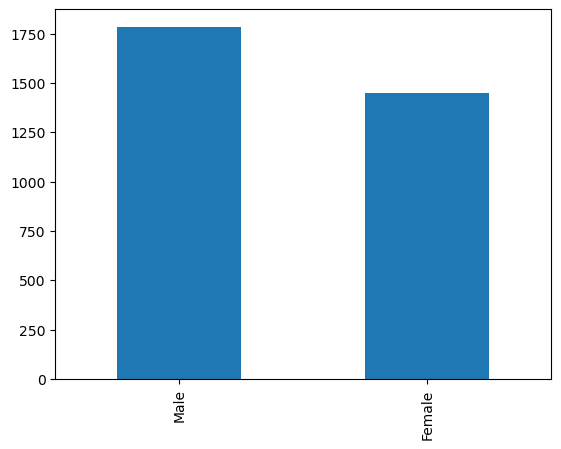

In [39]:
df['gender'].value_counts().plot.bar();

In [40]:
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

# to have a dict of gender & encode 
lable.fit(df['gender'])
label_name_mapping = dict(zip(lable.classes_, lable.transform(lable.classes_)))
print(label_name_mapping)

#Encode class col
df['gender']=lable.fit_transform(df['gender'])
df

{'Female': 0, 'Male': 1}


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4986,1,11.7,6.1,1,1,0,1,1
4990,1,12.6,5.7,0,0,1,0,0
4992,1,14.1,7.0,1,1,1,1,1
4993,1,11.6,5.9,0,0,0,1,0


In [41]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [42]:
#to round up all the columns
df.update(df.select_dtypes(np.number).apply(np.ceil))

In [43]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1.0,12.0,7.0,1.0,0.0,1.0,1.0,1.0
1,0.0,14.0,6.0,0.0,0.0,1.0,0.0,0.0
2,0.0,12.0,7.0,1.0,1.0,1.0,1.0,1.0
3,0.0,15.0,7.0,0.0,1.0,1.0,1.0,1.0
4,1.0,14.0,6.0,0.0,0.0,0.0,0.0,0.0


In [45]:
#to convert to int all the dataset
df = df.astype(int)

## ---------- Machine learning : supervised ------------

In [48]:
X = df.drop(['gender'], axis = 1)
y = df['gender']

In [49]:
SFM = SelectFromModel(estimator=RandomForestClassifier())
s = SFM.fit(X, y)

n_features = s.transform(X).shape[1]
n_features

4

In [50]:
feature_idx = s.get_support()
feature_name = X.columns[feature_idx]
feature_name

Index(['nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long'], dtype='object')

In [51]:
# Define our selected columns as our relevant features for modeling.
X = X.loc[: , feature_idx]

In [52]:
X

,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,0,1,1
1,0,0,1,0
2,1,1,1,1
3,0,1,1,1
4,0,0,0,0
...,...,...,...,...
4986,1,1,0,1
4990,0,0,1,0
4992,1,1,1,1
4993,0,0,0,1


In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2263, 4)
(2263,)
(970, 4)
(970,)


In [55]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')

The accuracy of the Random Forest Classifier is: 93.91752577319588 %


In [56]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = metrics.confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


The classification report for RandomForestClassifier is:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       425
           1       0.93      0.96      0.95       545

    accuracy                           0.94       970
   macro avg       0.94      0.94      0.94       970
weighted avg       0.94      0.94      0.94       970



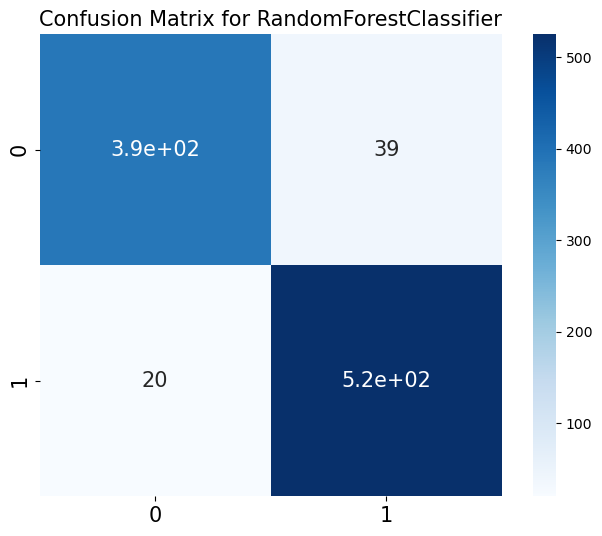

In [59]:
generate_results(rfc, y_pred_rfc, 'RandomForestClassifier')

In [60]:
print(metrics.roc_auc_score(y_test,y_pred_rfc))

0.9357690232056125


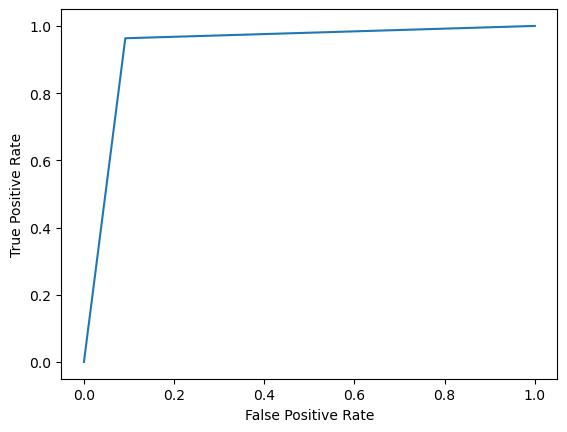

In [61]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_rfc)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()